In [1]:
import requests
from bs4 import BeautifulSoup
import os
import errno
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [14]:
vd_dir = 'voice_data/'
test_fp = vd_dir + '4175.wav'
print(test_fp)

voice_data/4175.wav


In [15]:
test_audio = AudioSegment.from_file(test_fp)

In [16]:
# Create one minute of sample audio:
clip_start = 120000
clip_end = 180000

test_audio_clip = test_audio[clip_start:clip_end]

In [17]:
test_audio_clip.export(out_f = 'test_audio_clip.wav', format='wav')

<_io.BufferedRandom name='test_audio_clip.wav'>

In [18]:
test_clip_fp = 'test_audio_clip.wav'

In [19]:
ipd.Audio(test_clip_fp)

In [20]:
test, test_sr = librosa.load(test_clip_fp)

In [21]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [22]:
s_test = librosa.stft(test, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [23]:
s_test.shape

(1025, 2584)

In [24]:
Y_test = np.abs(s_test) ** 2

In [25]:
def plot_spectromgram(Y, sr, hop_length, y_axis = 'linear'):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                            sr = test_sr,
                            x_axis = 'time',
                            y_axis = y_axis)
    plt.colorbar(format="%+2.f")
    plt.savefig('test_spectrogram.png')

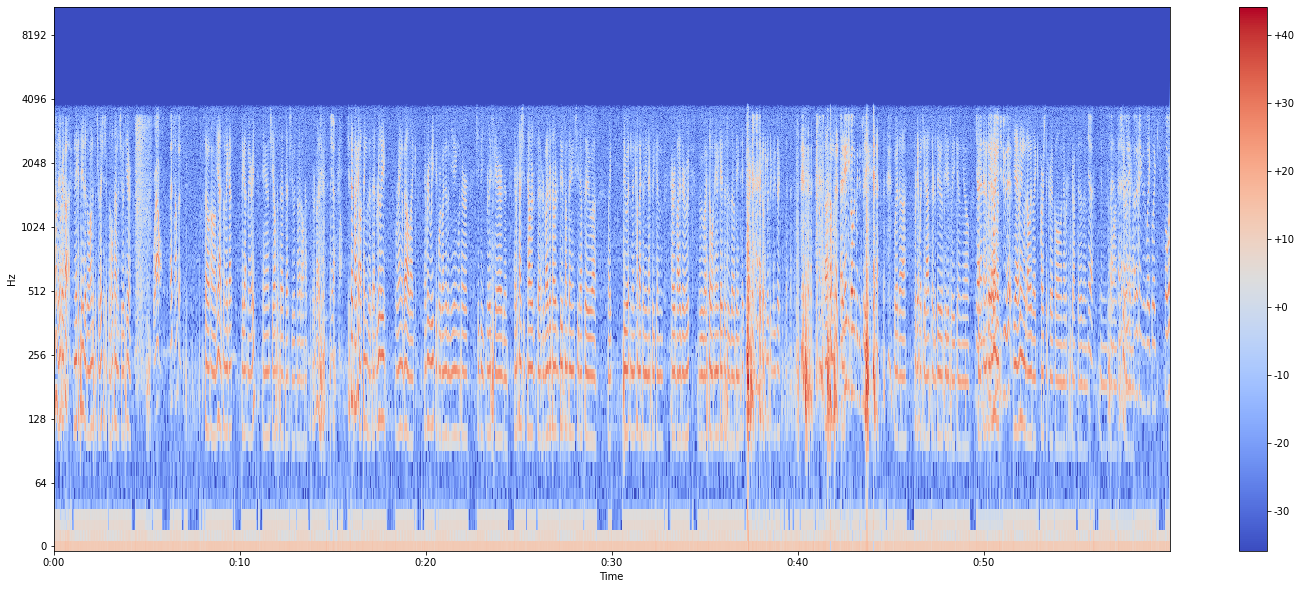

In [26]:
Y_log_scale = librosa.power_to_db(Y_test)

plot_spectromgram(Y_log_scale, test_sr, HOP_SIZE, y_axis = "log")

In [27]:
mfccs = librosa.feature.mfcc(y=Y_test)

In [28]:
mfccs.shape

(1025, 20, 6)

In [29]:
S = librosa.feature.melspectrogram(y=Y_test, sr=test_sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[[ 3.06869934e+02,  3.21453125e+02,  3.07571136e+02,
          3.55861359e+02,  3.64193298e+02,  3.26012573e+02],
        [ 7.14062653e+01,  4.17751617e+01,  1.99153137e+01,
          2.78060532e+01,  4.28242950e+01,  6.09286346e+01],
        [ 2.38678551e+01,  1.02464142e+01, -3.30368376e+00,
          2.52196336e+00,  4.23600149e+00,  1.81377792e+01],
        ...,
        [ 3.09354186e+00,  2.68099594e+00,  1.12168360e+00,
         -1.65480554e+00,  5.89102864e-01,  6.30862617e+00],
        [ 2.66312480e+00, -1.34525597e-02,  1.91532457e+00,
         -2.84469867e+00, -2.38380408e+00,  2.23422408e+00],
        [ 2.23451996e+00,  7.36771345e-01,  1.33390081e+00,
          4.73120975e+00,  6.79877663e+00,  1.53574049e-02]],

       [[ 2.01078476e+02,  2.13417114e+02,  2.51326050e+02,
          3.25385071e+02,  2.98797638e+02,  2.19519302e+02],
        [ 4.88131485e+01,  1.87599373e+01,  2.14700165e+01,
          3.19576454e+01,  3.07507553e+01,  3.86214409e+01],
        [ 3.48736

In [30]:
mfccs = librosa.feature.mfcc(y=Y_test, sr=test_sr, n_mfcc=40)

ValueError: too many values to unpack (expected 2)

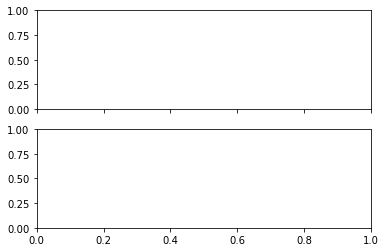

In [31]:
# From Librosa tutorial: https://librosa.org/doc/main/generated/librosa.feature.mfcc.html
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
                               #x_axis='time', y_axis='mel', fmax=8000,
                              # ax=ax[0])

In [ ]:
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')